In [6]:
import pandas as pd, numpy as np
import warnings
warnings.filterwarnings('ignore')

import torch
import torchvision 
from torchvision.utils import make_grid
from torchvision import transforms as T
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

import sys
sys.path.append('../')
from _utils import *

In [7]:
train_bboxes = pd.read_pickle('train_bboxes.pkl')
test_bboxes = pd.read_pickle('test_bboxes.pkl')

In [8]:
#Report the number of graffiti instances per set

print(f'Train set \t --> \t # of single bbox: \t {train_bboxes[train_bboxes.bbox_count==1]["bbox_count"].sum()}')
print(f'Train set \t --> \t # of multiple bbox: \t {train_bboxes[train_bboxes.bbox_count>1]["bbox_count"].sum()}')
print('------------------------------------------------------')
print(f'Test set \t --> \t # of single bbox: \t {test_bboxes[test_bboxes.bbox_count==1]["bbox_count"].sum()}')
print(f'Test set \t --> \t # of multiple bbox: \t {test_bboxes[test_bboxes.bbox_count>1]["bbox_count"].sum()}')
print('=======================================================')
print(f'Total number of bboxes in the dataset: \t \t {train_bboxes["bbox_count"].sum()+test_bboxes["bbox_count"].sum()}')


Train set 	 --> 	 # of single bbox: 	 4115
Train set 	 --> 	 # of multiple bbox: 	 9704
------------------------------------------------------
Test set 	 --> 	 # of single bbox: 	 1004
Test set 	 --> 	 # of multiple bbox: 	 2008
Total number of bboxes in the dataset: 	 	 16831


In [10]:
# Construct the Graffiti dataset for pytorch Dataloader 
# and demonstrate some example images with bboxes of training set
# the GraffitiData set has formerly develiped 
train_ds = GraffitiDataset('./split/train/graffiti/',
                           train_bboxes,
                           w=224,
                           h=224,
                           transforms=get_train_transform())
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True, collate_fn=collate_fn)

(-0.5, 910.5, 910.5, -0.5)

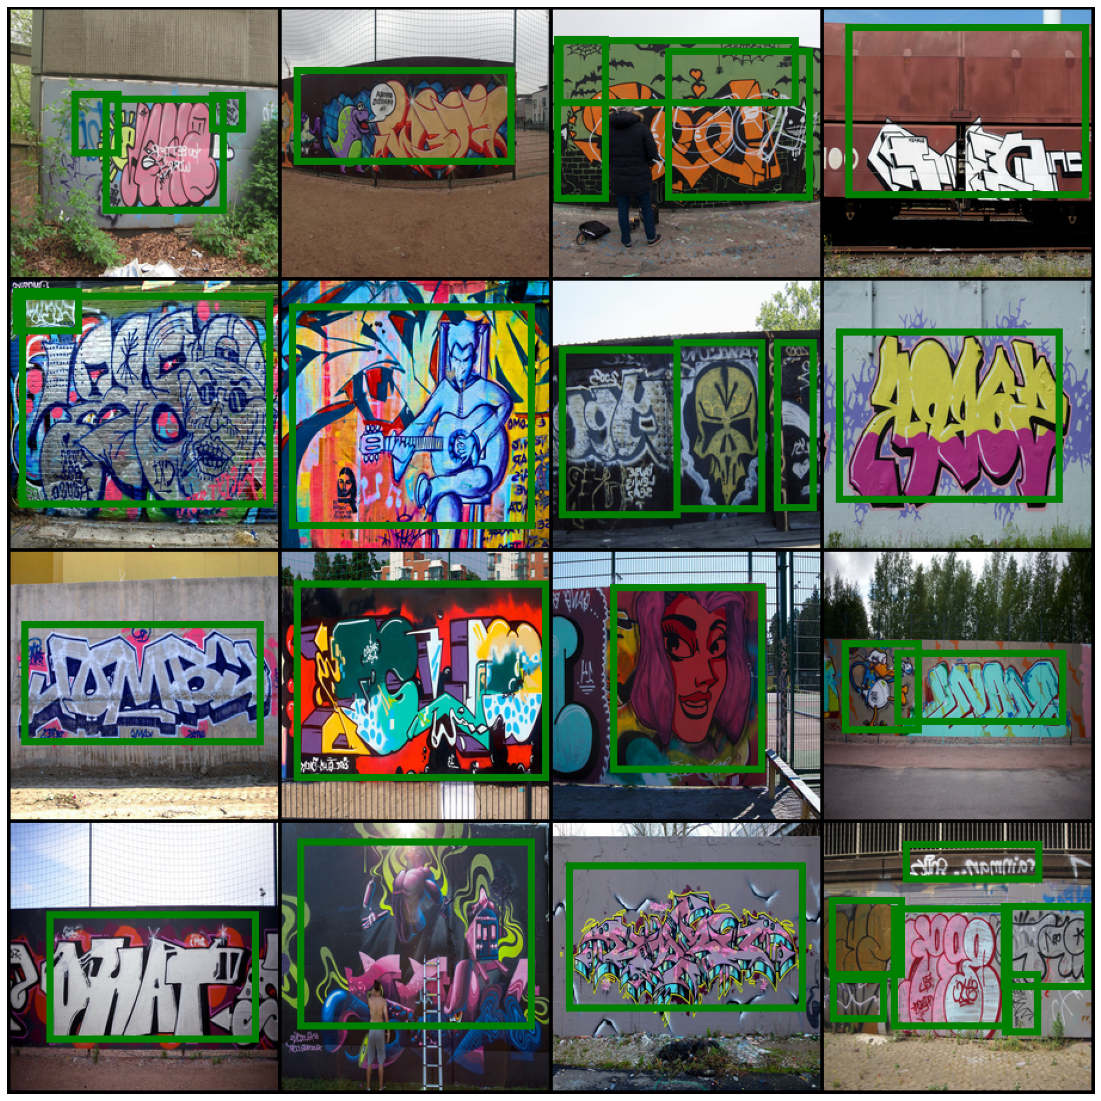

In [11]:
images, targets, img_id = next(iter(train_loader))
images = list(image.to(device) for image in images)

targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
images_bboxes = [plot_img_bbox(images[i],targets[i]['boxes'].cpu().detach().numpy()).permute(2,1,0) 
                 for i in range(len(images)) if len(targets[i]['boxes'])>=1]


generated = make_grid(images_bboxes, nrow=4, padding=3, normalize=False, 
                        range=None, scale_each=False, pad_value=0)
plt.subplots(figsize=(20,20))
plt.imshow(generated.cpu().detach().numpy().transpose(2,1,0))
plt.axis('off')